In [1]:
from fastbook import *

In [11]:
!ls

00_core.ipynb		_quarto.yml  standard_scaler.joblib
01_feature.ipynb	index.ipynb  styles.css
02_plot.ipynb		model	     tutorial_01_feature_plot.ipynb
03_train.ipynb		nbdev.yml    tutorial_02_target_transform_plot.ipynb
TSNE_standardize.ipynb	pca.pkl      tutorial_03_train.ipynb


In [14]:
df = pd.read_csv('/notebooks/atlas/target/standard_raw2.csv')

In [15]:
df

kinase substrate    target  position aa
0        AAK1       -5P  0.203681        -5  P
1      ACVR2A       -5P -0.497906        -5  P
2      ACVR2B       -5P -0.274530        -5  P
3        AKT1       -5P -0.138624        -5  P
4        AKT2       -5P -0.052269        -5  P
...       ...       ...       ...       ... ..
59989   YANK2        4y  2.094613         4  y
59990   YANK3        4y  1.741318         4  y
59991    YSK1        4y -1.249795         4  y
59992    YSK4        4y -0.729026         4  y
59993     ZAK        4y -0.883668         4  y

[59994 rows x 5 columns]

In [17]:
df2 = df.pivot_table(values='target', index='kinase', columns='substrate')

In [18]:
df2

substrate       -1A       -1C       -1D       -1E       -1F       -1G  \
kinase                                                                  
AAK1      -0.230001 -0.347964 -0.560306 -0.582931  0.005711  0.244323   
ACVR2A    -0.533758  1.866636  0.043243  0.132826 -0.043009 -0.890062   
ACVR2B    -0.559310 -0.105948  0.400708  0.181855 -0.252477 -0.903133   
AKT1      -0.259151 -0.304512 -0.271781 -0.615070 -0.164441  0.333217   
AKT2      -0.040184 -0.042766 -0.291349 -0.471855 -0.176206  0.139621   
...             ...       ...       ...       ...       ...       ...   
YANK2     -0.157227 -0.108269 -0.232248 -0.198854 -0.178066 -0.094269   
YANK3     -0.164260 -0.114061 -0.158188 -0.165931 -0.171577 -0.069915   
YSK1       0.071339  0.157253 -0.395211 -0.884632 -0.428139  2.125634   
YSK4      -0.483853 -0.465201  1.176942 -0.328822 -0.535056 -0.447636   
ZAK       -0.414177  0.034384  1.382949 -0.369506 -0.221146  0.743106   

substrate       -1H       -1I       -1K       -1L       -1M       -1N  \
kinase                                                                  
AAK1       0.218068 -0.156764  1.016970  0.167299  0.019240 -0.158167   
ACVR2A    -0.183401 -0.559071 -0.943735  0.105184  0.339279 -0.542205   
ACVR2B    -0.255393 -0.643793 -0.925934  0.290377  0.271718 -0.346213   
AKT1       0.185018 -0.665517  0.793952 -0.017097  0.139262  0.446368   
AKT2       0.243763 -0.495266  0.313493 -0.195893 -0.010791  0.591638   
...             ...       ...       ...       ...       ...       ...   
YANK2     -0.146543 -0.231931 -0.081875 -0.167686 -0.115651 -0.168983   
YANK3     -0.149858 -0.200345 -0.093243 -0.157807 -0.102471 -0.112193   
YSK1       0.700395 -1.060664  0.564810 -0.125523  0.377371  0.617558   
YSK4       0.533093 -1.160681 -0.106258  0.227053 -0.021648  0.525628   
ZAK        2.240435 -1.425289  0.185332 -0.679452  0.510424  1.805404   

substrate       -1P       -1Q       -1R       -1S       -1T       -1V  \
kinase                                                                  
AAK1       0.879005 -0.212013  0.565143 -0.410233 -0.333834 -0.220053   
ACVR2A    -0.740575 -0.424258 -0.879938  0.196536  0.297961 -0.134642   
ACVR2B    -0.865437 -0.549821 -0.960466 -0.319763 -0.168575 -0.206829   
AKT1       0.044888  0.016205  0.762837  0.142958 -0.151967 -0.551727   
AKT2       0.109201  0.106293  0.535850  0.064419 -0.110599 -0.413887   
...             ...       ...       ...       ...       ...       ...   
YANK2     -0.054347 -0.138474  0.056471 -0.103949 -0.067531 -0.224874   
YANK3      0.023368 -0.105023  0.070831 -0.041844 -0.087689 -0.163520   
YSK1      -0.756139 -0.348128  1.453694  0.104773  0.741868 -1.041487   
YSK4       0.093408 -0.258679 -0.327817 -0.139072  0.179438 -1.087376   
ZAK       -0.801070  0.371162  0.487893  0.414343  0.617993 -1.250353   

substrate       -1W       -1Y       -1t       -1y       -2A       -2C  \
kinase                                                                  
AAK1      -0.149010  0.348846 -0.619980 -0.535144 -0.104944 -0.060638   
ACVR2A     0.264999  0.185751  0.243869  0.863894 -0.748963  1.439747   
ACVR2B     0.557777  0.185483  0.991952  0.987905 -0.588890  0.898076   
AKT1      -0.335614  0.248481 -0.701018 -0.096163 -0.010842  0.029739   
AKT2      -0.226811  0.332127 -0.485826 -0.145635  0.028988  0.479719   
...             ...       ...       ...       ...       ...       ...   
YANK2     -0.216894 -0.112666 -0.139928 -0.002930 -0.166313 -0.065623   
YANK3     -0.184678 -0.138126 -0.105362 -0.038595 -0.144692 -0.011688   
YSK1      -0.207327  0.702830 -1.068175 -0.198637  0.052197  0.256723   
YSK4      -0.513867  0.870329 -0.730674  0.769800 -0.123235  0.192070   
ZAK       -0.417619  0.629236 -0.847534  0.154791 -0.257975  0.964907   

substrate       -2D       -2E       -2F       -2G       -2H       -2I  \
kinase                                                                  
AAK1       0.238376  0.021303 -0.365629 -0.434584 -0.0

In [19]:
df2 = df2.reset_index()

In [18]:
df2.corr().style.background_gradient()

In [4]:
kinase = pd.read_csv('supp1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'supp1.csv'

In [5]:
kinase = kinase[['kinase','Family','category','category_big']]

NameError: name 'kinase' is not defined

In [9]:
df2[['kinase']]

substrate  kinase
0            AAK1
1          ACVR2A
2          ACVR2B
3            AKT1
4            AKT2
..            ...
298         YANK2
299         YANK3
300          YSK1
301          YSK4
302           ZAK

[303 rows x 1 columns]

In [10]:
kinase = df2[['kinase']].merge(kinase)

In [11]:
kinase.rename(columns={'category_big':'Category'},inplace=True)

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, perplexity=30)

In [22]:
df2.iloc[:,1:].values.shape

(303, 198)

In [23]:
X = df2.iloc[:,1:].values

In [24]:
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [25]:
X_tsne.shape

(303, 2)

In [26]:
tsne = pd.DataFrame(X_tsne,columns=['TSNE1','TSNE2'])

In [27]:
import seaborn as sns

In [28]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

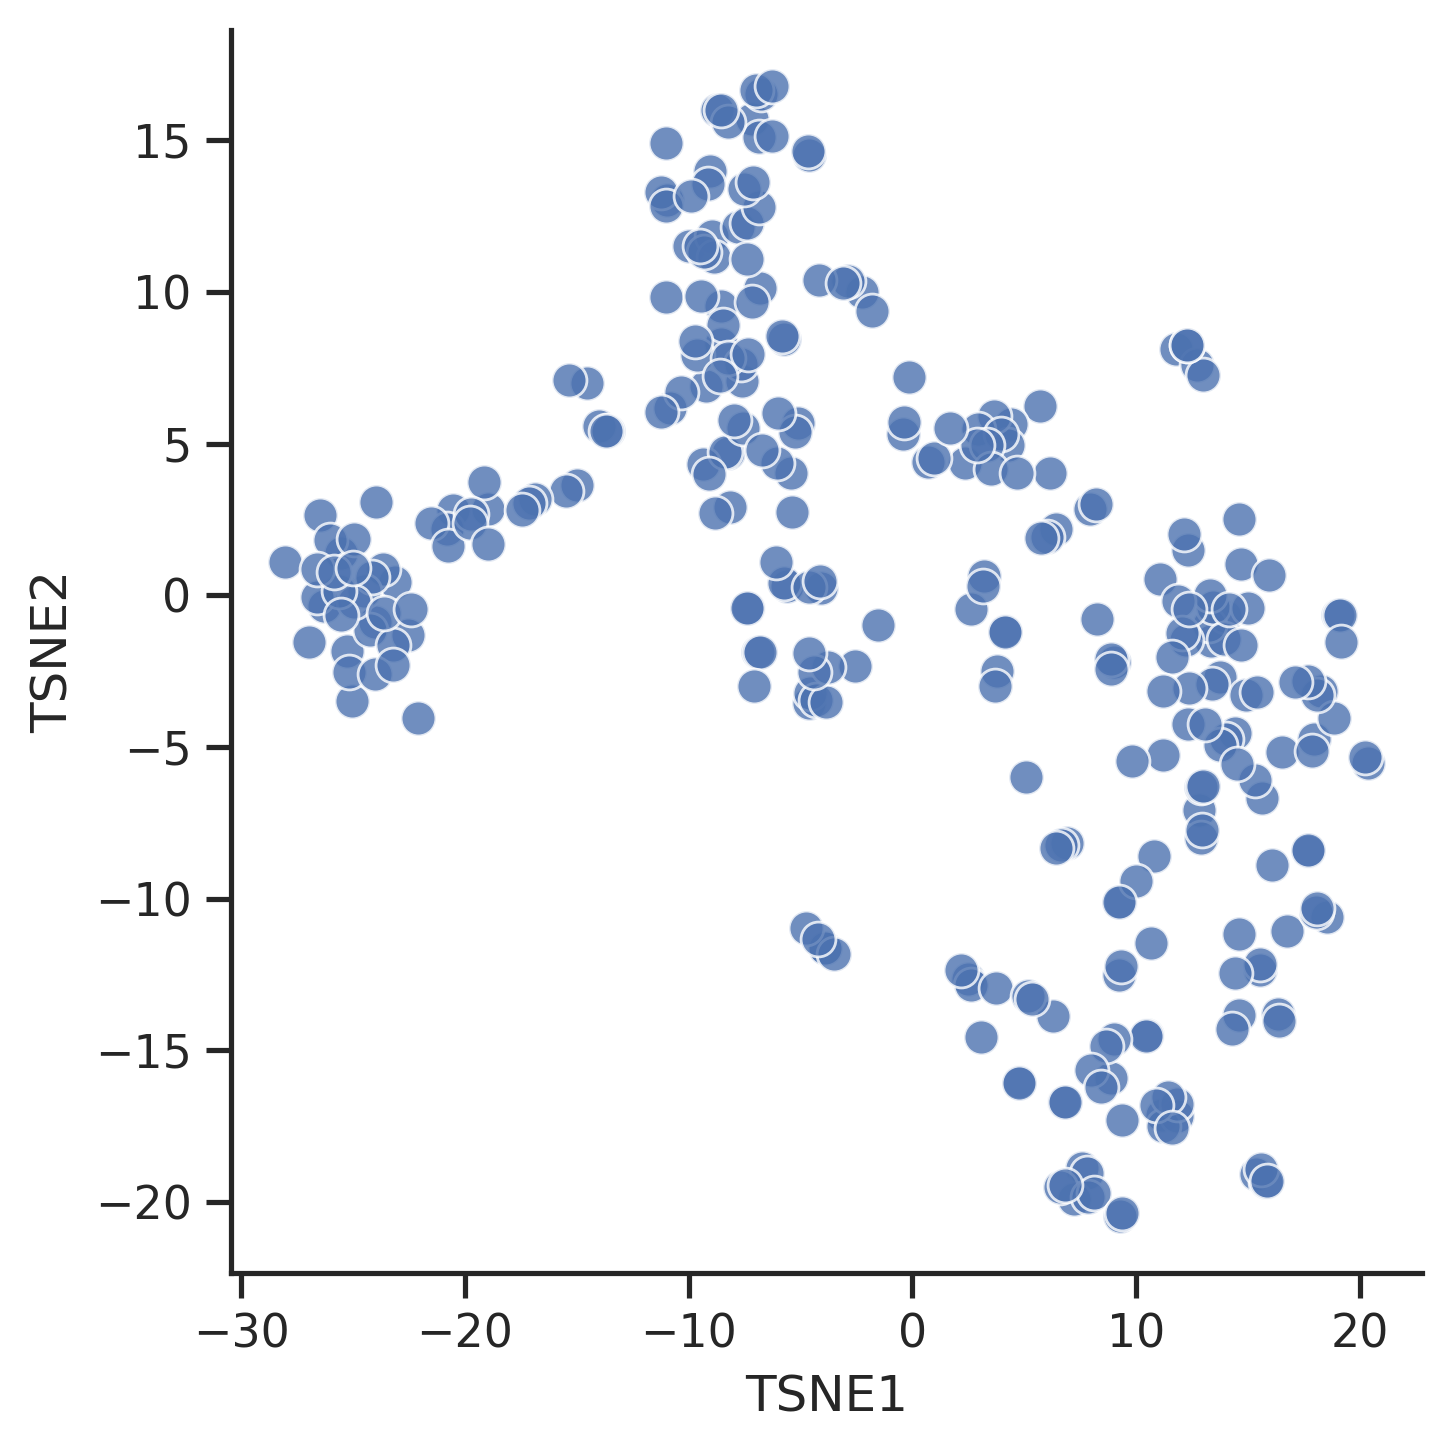

In [31]:
sns.relplot( 
            data = tsne,
            x = 'TSNE1',
            y='TSNE2',
            # hue=kinase.Family, 
            palette='tab20',
            height=5,
            s=70,
            alpha=0.8,
            edgecolor='white')

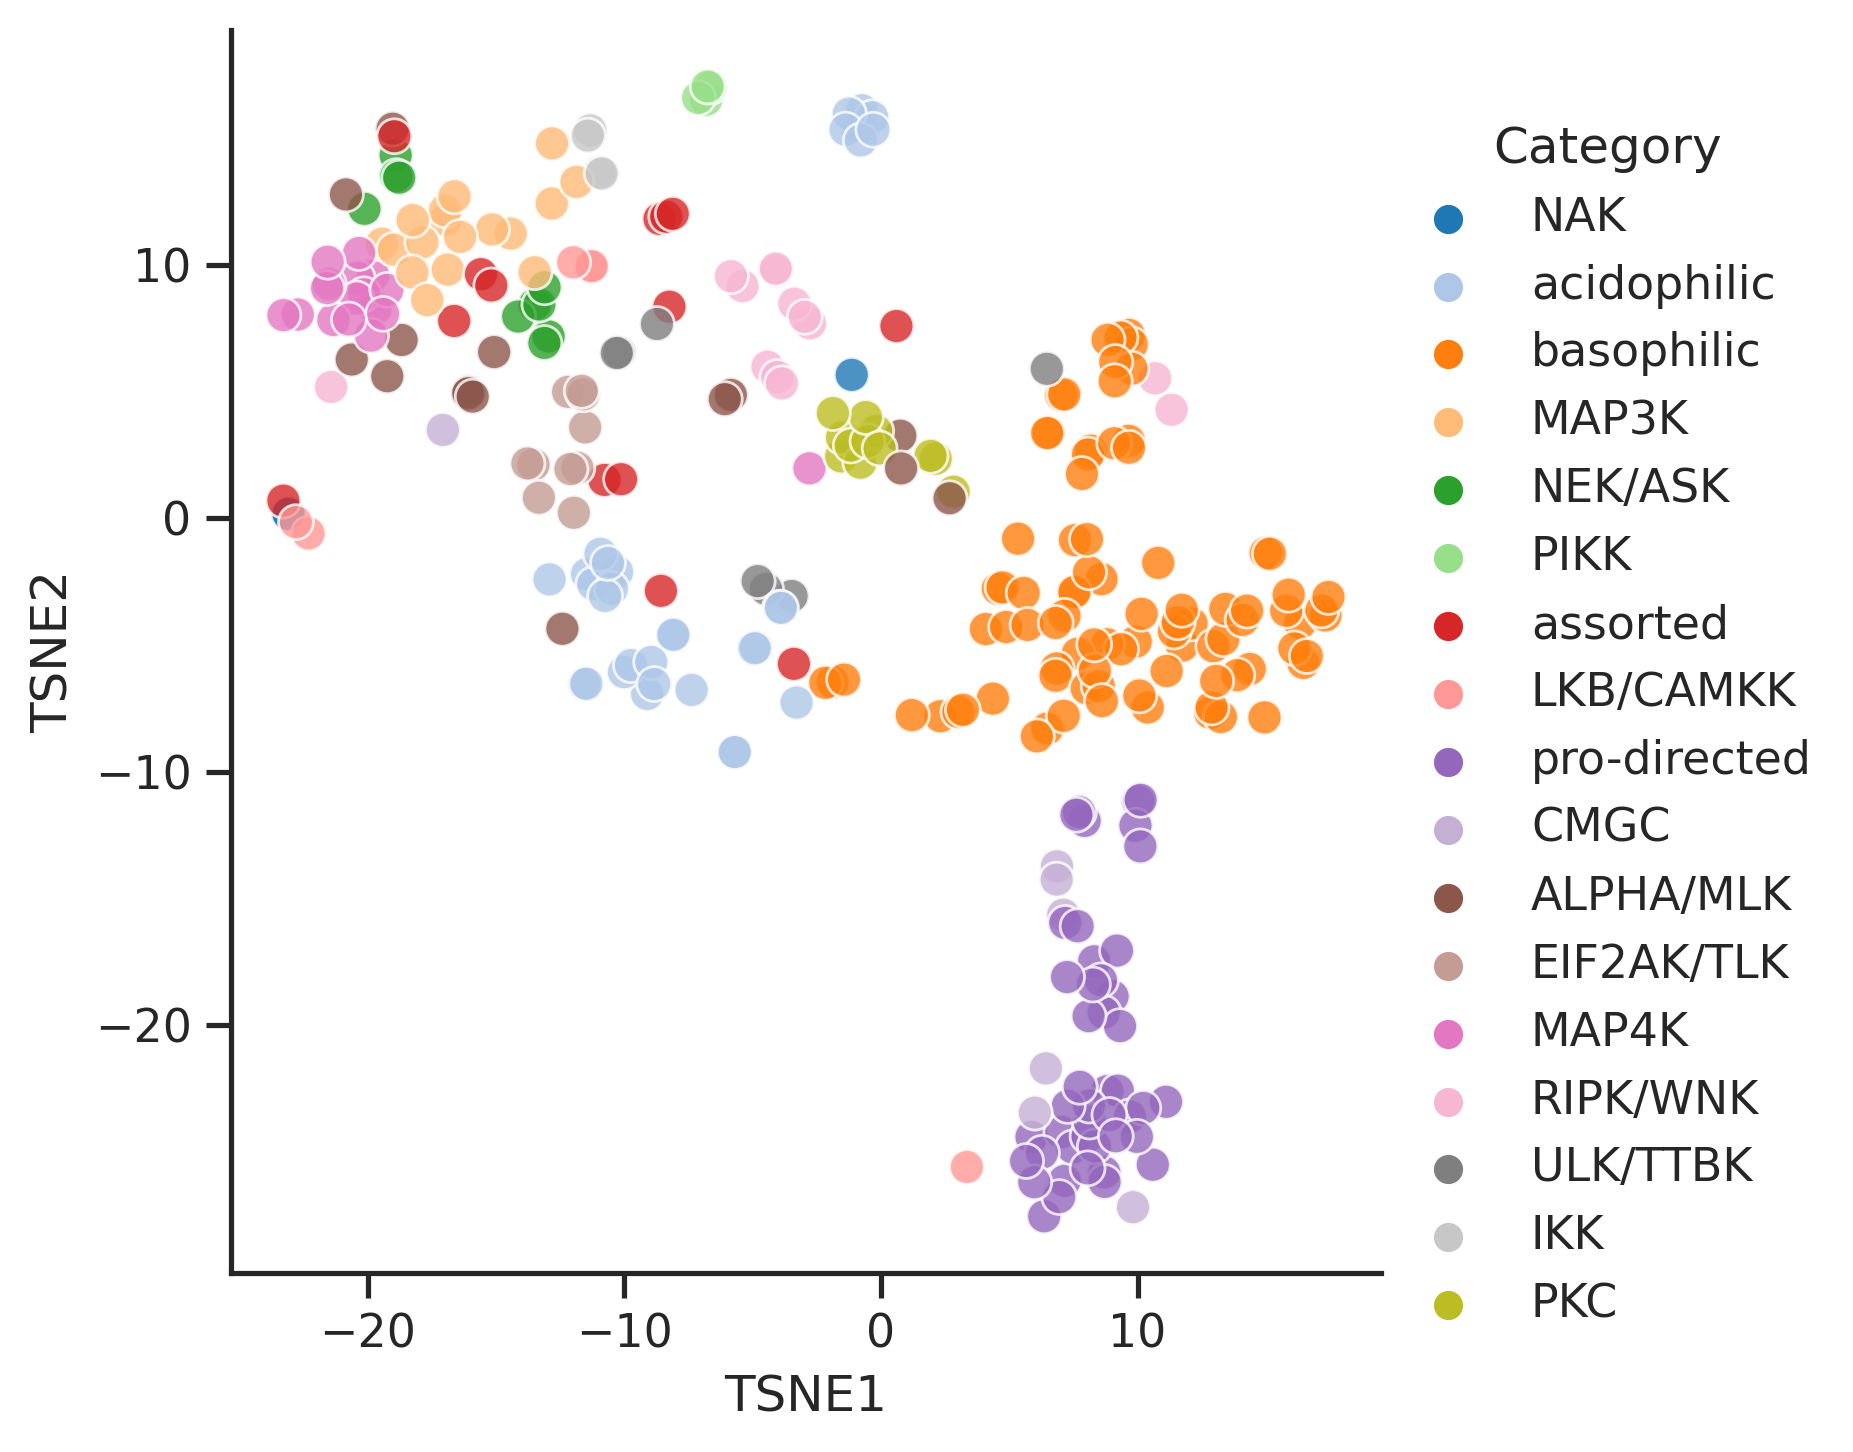

In [25]:
sns.relplot(            
            data = tsne,
            x = 'TSNE1',
            y='TSNE2',
            hue=kinase.Category, 
            palette='tab20',
            height=5,
            s=70,
            alpha=0.8).savefig('figures/Category.png')